# plot Linear policies 2 

        19 Jun 2023  JMA

In [77]:
import os, re, sys, math, glob
import numpy as np
import pandas as pd
import seaborn as sns

In [78]:
A = pd.read_csv('../stage/SVsamples-200_step_size-10_max_infection-150_severity_ceiling-120_max_days-100_171-00-39.csv', index_col=0)
A.drop('QN', axis=1, inplace=True)
A.shape

(39000, 9)

In [79]:
x = A.cohort.map(lambda x: [float(z) for z in re.findall(r'([-\.\d]+)',  x) ]  )
# the DataFrame constructor takes lists
y = pd.DataFrame(x.to_list())
# y = y.drop(2, axis=1)  # remove NaN column
A[['dose', 'daily_change']] =y 
A.drop('cohort', axis=1, inplace=True)
# Compute each cohort survival rate
cohorts = A.groupby(['dose', 'daily_change']).agg(lambda z: sum(z >0))
cohorts['survival'] = cohorts.reward / cohorts.day_number   # Divide by any column with positive values to get the count
cohorts.reset_index(inplace=True)
display(cohorts)

/tmp/ipykernel_6321/1571126634.py:8: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the function.
  cohorts = A.groupby(['dose', 'daily_change']).agg(lambda z: sum(z >0))


,dose,daily_change,day_number,infection,severity,reward,drug,cum_drug,efficacy,survival
0,0.45,-0.070,200,200,200,173,200,200,200,0.865
1,0.45,-0.065,200,200,200,172,200,200,200,0.860
2,0.45,-0.060,200,200,200,174,200,200,200,0.870
3,0.45,-0.055,200,200,200,173,200,200,200,0.865
4,0.45,-0.050,200,200,200,180,200,200,200,0.900
...,...,...,...,...,...,...,...,...,...,...
190,0.70,-0.020,200,200,200,192,200,200,200,0.960
191,0.70,-0.015,200,200,200,190,200,200,200,0.950
192,0.70,-0.010,200,200,200,191,200,200,200,0.955
193,0.70,-0.005,200,200,200,187,200,200,200,0.935


max at -0.0142


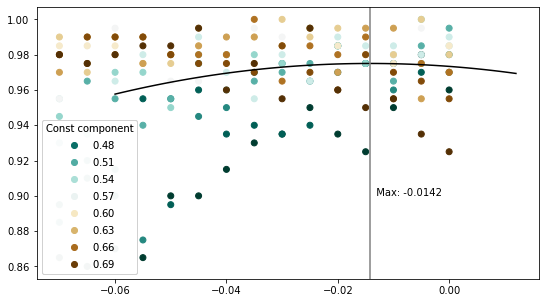

In [80]:
import matplotlib.pyplot as plt
from matplotlib import cm
import random

clrs = cm.get_cmap('plasma', 21)

plotable = cohorts[['dose', 'daily_change', 'survival']]
near_slope = plotable # plotable.loc[(plotable.daily_change <= 0.02) & (plotable.daily_change > -0.06 ),:]
p3 = np.polyfit(near_slope.daily_change, near_slope.survival, 2)
x_dose = np.linspace(-0.06, 0.012)
y_func = np.poly1d(p3)
quadratic_max = - p3[1]/(2 * p3[0])
print(f'max at {quadratic_max:.3}')
#plotable['dose'] = plotable['dose'].astype(str)
#plotable['survival'] = plotable['survival'].apply(lambda z: z +random.uniform(-0.1, 0.0))
fig, ax = plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(5)
sc = ax.scatter(plotable.daily_change, plotable.survival, marker='o',   c=plotable.dose, cmap='BrBG_r')
ax.plot(x_dose, y_func(x_dose), 'black')
ax.axvline(quadratic_max, color='grey')
ax.text(quadratic_max, 0.9, f'  Max: {quadratic_max:.3}')
legend1 = ax.legend(*sc.legend_elements(),
                    loc="lower left", title="Const component")
ax.add_artist(legend1)


Quadratic max at 0.601


Text(0.6008707585081686, 0.9, '  Max: 0.601')

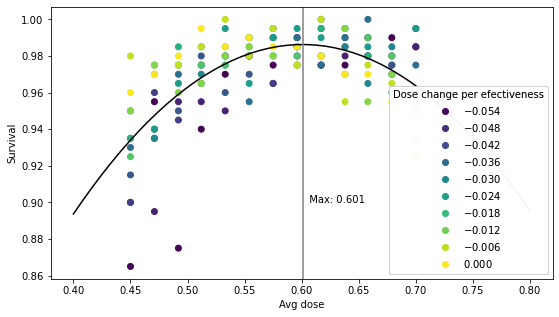

In [83]:
#display(plotable.sort_values('survival', ascending=False))
near_max = plotable.loc[(plotable.daily_change <= 0.02) & (plotable.daily_change > -0.06 ),:]
p3 = np.polyfit(near_max.dose, near_max.survival, 2)
x_dose = np.linspace(0.4, 0.8)
y_func = np.poly1d(p3)
quadratic_max = - p3[1]/(2 * p3[0])
print(f'Quadratic max at {quadratic_max:.3}')

fig, ax = plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(5)
sc = ax.scatter(near_max.dose, near_max.survival, c=near_max.daily_change)
ax.plot(x_dose, y_func(x_dose), 'black')
ax.set_xlabel('Avg dose')
ax.set_ylabel('Survival')
legend1 = ax.legend(*sc.legend_elements(),
                    loc="lower right", title="Dose change per efectiveness")
ax.add_artist(legend1)
ax.axvline(quadratic_max, color='grey')
ax.text(quadratic_max, 0.9, f'  Max: {quadratic_max:.3}')

In [82]:
# Dose sequence
# min(self.max_dose, 
#    max(0, 
#        self.const_dose + self.daily_change * (yesterday['cum_drug'] - self.mid_day)))
day = list(range(16))
print([round(-0.156 * (d - 0.5) + 0.554, 3) for d in day])



[0.632, 0.476, 0.32, 0.164, 0.008, -0.148, -0.304, -0.46, -0.616, -0.772, -0.928, -1.084, -1.24, -1.396, -1.552, -1.708]
